reference: https://intellipaat.com/blog/tutorial/spark-tutorial/machine-learning-with-pyspark-tutorial/

In [1]:
from pyspark import SparkConf, SparkContext
from pyspark.sql import SQLContext

In [2]:
sc

<SparkContext master=local[*] appName=PySparkShell>

In [3]:
fortune500_df = sqlContext.read.format('com.databricks.spark.csv')\
                            .options(header='true', inferschema='true')\
                            .load('Fortune_500_2017.csv')

In [4]:
fortune500_df.show(2)

+----+------------------+--------------------+---------+----------+--------------------+---------------+-------------------+-----------+-------+-----+------------+-------------------+--------------------+--------------------+------+--------------------+--------+---------+-------+----------+--------+-----------+
|Rank|             Title|             Website|Employees|    Sector|            Industry|     Hqlocation|             Hqaddr|     Hqcity|Hqstate|Hqzip|       Hqtel|                Ceo|           Ceo-title|             Address|Ticker|            Fullname|Revenues|Revchange|Profits|Prftchange|  Assets|Totshequity|
+----+------------------+--------------------+---------+----------+--------------------+---------------+-------------------+-----------+-------+-----+------------+-------------------+--------------------+--------------------+------+--------------------+--------+---------+-------+----------+--------+-----------+
|   1|           Walmart|http://www.walmar...|  2300000| Reta

In [5]:
fortune500_df2 = spark.read.format('csv')\
                            .options(header='true', inferschema='true')\
                            .load('Fortune_500_2017.csv')

In [6]:
fortune500_df2.show(3)

+----+------------------+--------------------+---------+----------+--------------------+---------------+-------------------+-----------+-------+-----+------------+-------------------+--------------------+--------------------+------+--------------------+--------+---------+-------+----------+--------+-----------+
|Rank|             Title|             Website|Employees|    Sector|            Industry|     Hqlocation|             Hqaddr|     Hqcity|Hqstate|Hqzip|       Hqtel|                Ceo|           Ceo-title|             Address|Ticker|            Fullname|Revenues|Revchange|Profits|Prftchange|  Assets|Totshequity|
+----+------------------+--------------------+---------+----------+--------------------+---------------+-------------------+-----------+-------+-----+------------+-------------------+--------------------+--------------------+------+--------------------+--------+---------+-------+----------+--------+-----------+
|   1|           Walmart|http://www.walmar...|  2300000| Reta

In [7]:
fortune500_df.printSchema()

root
 |-- Rank: integer (nullable = true)
 |-- Title: string (nullable = true)
 |-- Website: string (nullable = true)
 |-- Employees: integer (nullable = true)
 |-- Sector: string (nullable = true)
 |-- Industry: string (nullable = true)
 |-- Hqlocation: string (nullable = true)
 |-- Hqaddr: string (nullable = true)
 |-- Hqcity: string (nullable = true)
 |-- Hqstate: string (nullable = true)
 |-- Hqzip: integer (nullable = true)
 |-- Hqtel: string (nullable = true)
 |-- Ceo: string (nullable = true)
 |-- Ceo-title: string (nullable = true)
 |-- Address: string (nullable = true)
 |-- Ticker: string (nullable = true)
 |-- Fullname: string (nullable = true)
 |-- Revenues: string (nullable = true)
 |-- Revchange: double (nullable = true)
 |-- Profits: double (nullable = true)
 |-- Prftchange: string (nullable = true)
 |-- Assets: double (nullable = true)
 |-- Totshequity: double (nullable = true)



In [8]:
fortune500_df.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
Rank,500,250.492,144.47736623675496,1,500
Title,500,None,None,3M,salesforce.com
Website,500,None,None,http://ir.yumchina.com,http://www.zimmerbiomet.com
Employees,500,56350.132,123452.02592111082,83,2300000
Sector,500,None,None,Aerospace & Defense,Wholesalers
Industry,500,None,None,"Advertising, Marketing",Wholesalers: Health Care
Hqlocation,500,None,None,"Abbott Park, IL","Woonsocket, RI"
Hqaddr,500,None,None,1 ADP Blvd.,N56 W17000 Ridgewood Dr.
Hqcity,500,None,None,Abbott Park,Woonsocket


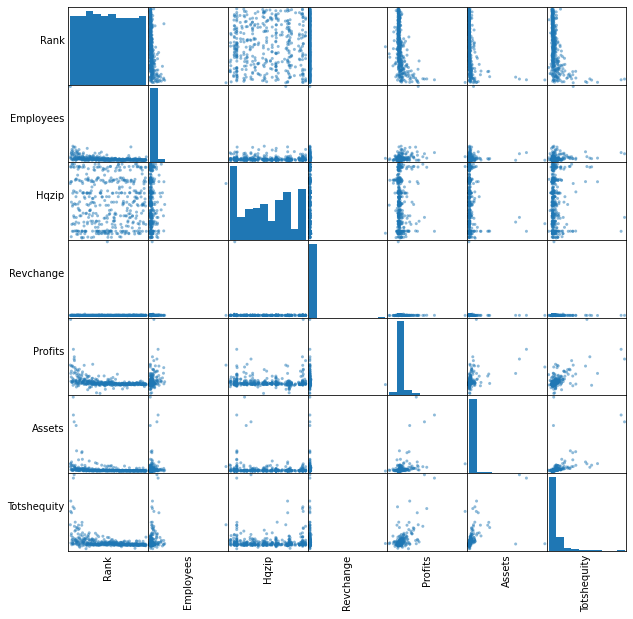

In [22]:
import pandas as pd
from pandas.plotting import scatter_matrix
numeric_features = [t[0] for t in fortune500_df.dtypes if t[1] == 'int' or t[1] == 'double']
sampled_data = fortune500_df.select(numeric_features).sample(False, 0.8).toPandas()
axs = scatter_matrix(sampled_data, figsize=(10, 10))
n = len(sampled_data.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

In [20]:
import six
for i in fortune500_df.columns:
    if not( isinstance(fortune500_df.select(i).take(1)[0][0], six.string_types)):
        print( "Correlation to Employees for ", i, fortune500_df.stat.corr('Employees',i))


Correlation to Employees for  Rank -0.352639589494228
Correlation to Employees for  Employees 1.0
Correlation to Employees for  Hqzip 0.014256984305479687
Correlation to Employees for  Revchange 0.0037009154920266316
Correlation to Employees for  Profits 0.3426032482000915
Correlation to Employees for  Assets 0.12690120378798117
Correlation to Employees for  Totshequity 0.27529956126837296
